# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [60]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [30]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [32]:
sinasc_raw1 = sinasc_raw[['munResNome', 'IDADEMAE', 'IDADEPAI']]
sinasc_raw1

,munResNome,IDADEMAE,IDADEPAI
0,Alta Floresta D'Oeste,19,26.0
1,Alta Floresta D'Oeste,29,24.0
2,Alta Floresta D'Oeste,37,32.0
3,Alto Alegre dos Parecis,30,24.0
4,Alta Floresta D'Oeste,30,27.0
...,...,...,...
27023,Vilhena,32,35.0
27024,Chupinguaia,19,NaN
27025,Vilhena,24,30.0
27026,Vilhena,21,24.0


In [92]:
# Idade média das mães e dos pais por município
sinasc_raw1.groupby('munResNome').mean().sort_values('IDADEPAI')

,IDADEMAE,IDADEPAI
munResNome,,
Município ignorado - RO,24.000000,22.000000
Rio Crespo,26.660000,28.000000
Alto Paraíso,24.960177,28.833333
Alto Alegre dos Parecis,24.844156,29.179104
Governador Jorge Teixeira,24.401786,29.222222
Alta Floresta D'Oeste,25.991826,29.548701
Chupinguaia,25.333333,29.629630
Pimenta Bueno,25.199675,29.745174
Candeias do Jamari,25.243323,29.894737


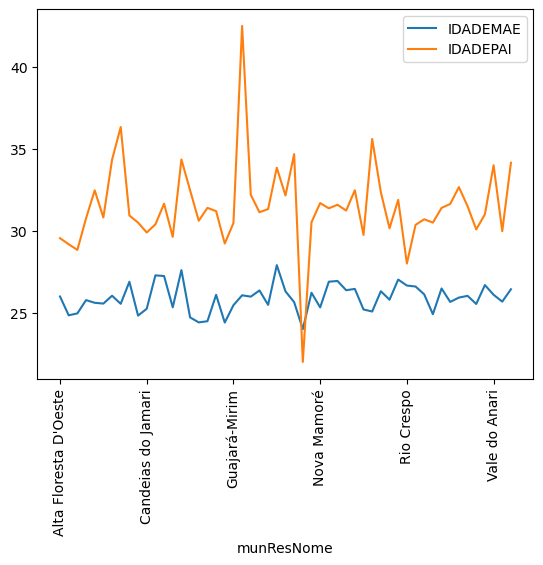

In [89]:
sinasc_raw1.groupby('munResNome').mean().plot()
plt.xticks(rotation = 90);

### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [34]:
# como data de nascimento está representada
sinasc_raw2 = sinasc_raw['DTNASC']
sinasc_raw2

0        2019-02-19
1        2019-02-21
2        2019-02-25
3        2019-03-20
4        2019-03-23
            ...    
27023    2019-12-13
27024    2019-10-04
27025    2019-08-02
27026    2019-12-23
27027    2019-12-27
Name: DTNASC, Length: 27028, dtype: object

In [35]:
# df com informações de bebês que nasceram dia 24/08

sinasc_raw2 = sinasc_raw.loc[sinasc_raw['DTNASC'] == '2019-08-24']
sinasc_raw2

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
14067,1,2515504.0,110002,1,20,1.0,12 anos ou mais,999991.0,0.0,0.0,...,4,1480600,ATIVO,MUNIC,Ariquemes,Rondônia,-9.90846,-63.03327,139.0,4426.571
14198,1,2494299.0,110002,1,15,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,1480732,ATIVO,MUNIC,Monte Negro,Rondônia,-10.26310,-63.29556,155.0,1931.378
14199,1,2494299.0,110002,1,24,5.0,4 a 7 anos,999992.0,3.0,1.0,...,3,1480733,ATIVO,MUNIC,Ariquemes,Rondônia,-9.90846,-63.03327,139.0,4426.571
14200,1,2494299.0,110002,1,30,5.0,8 a 11 anos,999992.0,1.0,1.0,...,5,1480734,ATIVO,MUNIC,Ariquemes,Rondônia,-9.90846,-63.03327,139.0,4426.571
14220,1,2494299.0,110002,1,37,5.0,8 a 11 anos,999992.0,2.0,1.0,...,5,1480754,ATIVO,MUNIC,Ariquemes,Rondônia,-9.90846,-63.03327,139.0,4426.571
15317,1,2496046.0,110004,1,20,2.0,8 a 11 anos,999992.0,0.0,0.0,...,5,1481859,ATIVO,MUNIC,Cacoal,Rondônia,-11.43387,-61.44294,177.0,3792.998
16420,1,2515768.0,110010,1,27,1.0,8 a 11 anos,999992.0,5.0,0.0,...,9,1482970,ATIVO,MUNIC,Guajará-Mirim,Rondônia,-10.77388,-65.32395,133.0,24855.724
16421,1,2515768.0,110010,1,20,1.0,8 a 11 anos,999992.0,1.0,0.0,...,9,1482971,ATIVO,MUNIC,Guajará-Mirim,Rondônia,-10.77388,-65.32395,133.0,24855.724
16422,1,2515768.0,110010,1,20,1.0,8 a 11 anos,999992.0,0.0,0.0,...,9,1482972,ATIVO,MUNIC,Guajará-Mirim,Rondônia,-10.77388,-65.32395,133.0,24855.724
16894,1,2808609.0,110011,1,18,5.0,8 a 11 anos,999991.0,0.0,0.0,...,5,1483444,ATIVO,MUNIC,Jaru,Rondônia,-10.43595,-62.47623,163.0,2944.128


In [36]:
# df com data de nascimento (conferindo se apenas minha data de nascimento foi selecionada)
sinasc_raw2 = sinasc_raw2[['DTNASC', 'ESCMAE', 'PESO', 'SEXO']]
sinasc_raw2

,DTNASC,ESCMAE,PESO,SEXO
14067,2019-08-24,12 anos ou mais,3155,Feminino
14198,2019-08-24,8 a 11 anos,2620,Feminino
14199,2019-08-24,4 a 7 anos,3900,Feminino
14200,2019-08-24,8 a 11 anos,2940,Feminino
14220,2019-08-24,8 a 11 anos,3468,Feminino
15317,2019-08-24,8 a 11 anos,3525,Masculino
16420,2019-08-24,8 a 11 anos,4045,Feminino
16421,2019-08-24,8 a 11 anos,3020,Feminino
16422,2019-08-24,8 a 11 anos,3705,Masculino
16894,2019-08-24,8 a 11 anos,3565,Feminino


In [37]:
# df com escolaridade da mãe, peso e sexo dos bebês 
sinasc_raw2 = sinasc_raw2[['ESCMAE', 'PESO', 'SEXO']]
sinasc_raw2

,ESCMAE,PESO,SEXO
14067,12 anos ou mais,3155,Feminino
14198,8 a 11 anos,2620,Feminino
14199,4 a 7 anos,3900,Feminino
14200,8 a 11 anos,2940,Feminino
14220,8 a 11 anos,3468,Feminino
15317,8 a 11 anos,3525,Masculino
16420,8 a 11 anos,4045,Feminino
16421,8 a 11 anos,3020,Feminino
16422,8 a 11 anos,3705,Masculino
16894,8 a 11 anos,3565,Feminino


In [79]:
# Peso médio dos bebes por sexo que nasceram no dia do meu aniversário por faixas de escolaridade da mãe
sinasc_raw2.groupby(['ESCMAE', 'SEXO']).mean().unstack()

PESO             
SEXO                Feminino    Masculino
ESCMAE                                   
12 anos ou mais  3295.714286  3440.000000
4 a 7 anos       3900.000000  3617.500000
8 a 11 anos      3386.352941  3329.058824

<Axes: xlabel='ESCMAE'>

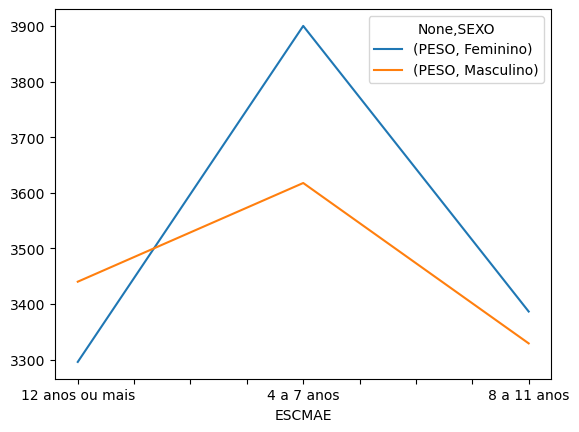

In [80]:
sinasc_raw2.groupby(['ESCMAE', 'SEXO']).mean().unstack().plot()

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [39]:
sinasc_raw3 = sinasc_raw[['munResNome', 'IDADEMAE']]
sinasc_raw3

,munResNome,IDADEMAE
0,Alta Floresta D'Oeste,19
1,Alta Floresta D'Oeste,29
2,Alta Floresta D'Oeste,37
3,Alto Alegre dos Parecis,30
4,Alta Floresta D'Oeste,30
...,...,...
27023,Vilhena,32
27024,Chupinguaia,19
27025,Vilhena,24
27026,Vilhena,21


In [40]:
# Qual o municipio que nasceu menos bebês em 2019?

sinasc_raw3.groupby('munResNome').count().sort_values('IDADEMAE')

,IDADEMAE
munResNome,
Município ignorado - RO,1
Castanheiras,32
Pimenteiras do Oeste,40
Primavera de Rondônia,43
Parecis,44
Rio Crespo,50
São Felipe D'Oeste,54
Teixeirópolis,64
Cacaulândia,75


O município que menos nasceu bebês em 2019 foi Castanheiras. 

In [41]:
# qual a idade media, maxima, minima das maes nesse municipio?
sinasc_raw4 = sinasc_raw.loc[sinasc_raw['munResNome'] == 'Castanheiras']
sinasc_raw4 = sinasc_raw4[['IDADEMAE', 'munResNome']]
sinasc_raw4.groupby('munResNome').agg(['mean', max, min])

IDADEMAE        
                  mean max min
munResNome                    
Castanheiras  27.28125  39  17

In [42]:
# qual a idade media, maxima, minima dos pais nesse municipio?
sinasc_raw5 = sinasc_raw.loc[sinasc_raw['munResNome'] == 'Castanheiras']
sinasc_raw5 = sinasc_raw5[['IDADEPAI', 'munResNome']]
sinasc_raw5.groupby('munResNome').agg(['mean', max, min])

IDADEPAI            
                   mean   max   min
munResNome                         
Castanheiras  30.392857  43.0  17.0

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [61]:
# mudando o tipo da coluna DTNASC 
sinasc_raw['DTNASC'] = pd.to_datetime(sinasc_raw['DTNASC'])

In [63]:
sinasc_raw.dtypes.head(20)

ORIGEM                 int64
CODESTAB             float64
CODMUNNASC             int64
LOCNASC                int64
IDADEMAE               int64
ESTCIVMAE            float64
ESCMAE                object
CODOCUPMAE           float64
QTDFILVIVO           float64
QTDFILMORT           float64
CODMUNRES              int64
GESTACAO              object
GRAVIDEZ              object
PARTO                 object
CONSULTAS              int64
DTNASC        datetime64[ns]
HORANASC             float64
SEXO                  object
APGAR1               float64
APGAR5               float64
dtype: object

In [64]:
# criando uma coluna com apenas o mês da data de nascimento
sinasc_raw['mes'] = sinasc_raw['DTNASC'].dt.month

In [66]:
# conferindo se o mês está correto
sinasc_raw[['DTNASC','mes']]

,DTNASC,mes
0,2019-02-19,2
1,2019-02-21,2
2,2019-02-25,2
3,2019-03-20,3
4,2019-03-23,3
...,...,...
27023,2019-12-13,12
27024,2019-10-04,10
27025,2019-08-02,8
27026,2019-12-23,12


In [73]:
# Qual o municipio que nasceu mais bebês no mês de março?

sinasc_raw6 = sinasc_raw.loc[sinasc_raw['mes'] == 3]
sinasc_raw6[['munResNome', 'IDADEMAE']].groupby('munResNome').count().sort_values('IDADEMAE')

,IDADEMAE
munResNome,
Teixeirópolis,3
Castanheiras,4
Novo Horizonte do Oeste,5
Primavera de Rondônia,5
São Felipe D'Oeste,5
Ministro Andreazza,6
Parecis,6
Pimenteiras do Oeste,6
Cabixi,6


No mês de março nasceram mais bebês em Porto Velho.

In [76]:
# qual a quantidade de filhos vivos media, maxima, minima nesse municipio?

sinasc_raw7 = sinasc_raw.loc[sinasc_raw['munResNome'] == 'Porto Velho']
sinasc_raw7[['munResNome', 'QTDFILVIVO']].groupby('munResNome').agg(['mean', max, min])

QTDFILVIVO           
                  mean   max  min
munResNome                       
Porto Velho   1.167236  12.0  0.0

In [77]:
# qual a idade media, maxima, minima dos pais nesse municipio?

sinasc_raw7[['munResNome', 'IDADEMAE', 'IDADEPAI']].groupby('munResNome').agg(['mean', max, min])

IDADEMAE           IDADEPAI            
                 mean max min       mean   max   min
munResNome                                          
Porto Velho  26.31267  47  12  32.352679  65.0  16.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

- Comparando o mês de março com o ano todo, parece seguir uma proporção. Porto Velho é o município onde mais bebês nasceram nos dois casos (o que é compreensível, uma vez que é a capital) e municípios como Castanheiras, Teixeirópolis, Primavera de Rondônia e Pimenteiras do Oeste aparecerem como os que nasceram menos bebês (em março e no ano todo).
- No dia do meu aniversário (24/08) o peso médio dos bebês do sexo feminino tende a ser maior do que bebês do sexo masculino, o que difere dos dados vistos em aula (em que os meninos tendiam a ter o peso médio maior).
- A média de idade do pai é sempre maior do que a média de idade da mãe, em todos os municípios conhecidos (no Município ignorado o resultado se inverte). 